In [6]:
%pylab inline

from jade.run_manager.wandb import WANDBRunManager

Populating the interactive namespace from numpy and matplotlib


In [12]:
import os

os.environ['WANDB_PROJECT']='jade_test'

run_manager = WANDBRunManager(run_id='1q04if0j', experiments_root='/tmp', verbose=True)

Run mfederici/jade_test/1q04if0j has been found


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: mfederici (use `wandb login --relogin` to force relogin)


{
    "data": {
        "test": {
            "class": "MNISTWrapper",
            "params": {
                "download": true,
                "root": "/data",
                "split": "valid"
            }
        },
        "train": {
            "class": "MNISTWrapper",
            "params": {
                "download": true,
                "root": "/data",
                "split": "train"
            }
        }
    },
    "eval": {
        "ELBO/Test": {
            "class": "ELBOEvaluation",
            "params": {
                "evaluate_on": "test"
            }
        },
        "ELBO/Train": {
            "class": "ELBOEvaluation",
            "params": {
                "evaluate_on": "train"
            }
        },
        "ImageReconstructions/Test": {
            "class": "ReconstructionEvaluation",
            "params": {
                "evaluate_every": 2,
                "evaluate_on": "test",
                "n_pictures": 10,
                "sample_images": 

In [13]:
model = run_manager.instantiate_model(resume=True)

Instantiating class VariationalAutoencoder from /tmp/1q04if0j/code/models/VAE.py
Dowloading the last checkpoint: last_checkpoint.pt
Resuming Training
Resuming Training from iteration 1960


In [14]:
model

VariationalAutoencoder(
  (encoder): Encoder(
    (net): Sequential(
      (0): Flatten()
      (1): Linear(in_features=784, out_features=1024, bias=True)
      (2): ReLU(inplace=True)
      (3): Linear(in_features=1024, out_features=256, bias=True)
      (4): ReLU(inplace=True)
      (5): StochasticLinear(in_features=256, out_features=128, bias=True)
    )
  )
  (decoder): Decoder(
    (net): Sequential(
      (0): Linear(in_features=64, out_features=256, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=256, out_features=1024, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=1024, out_features=784, bias=True)
      (5): Reshape()
    )
  )
  (prior): Prior()
)

In [15]:
datasets = run_manager.instantiate_datasets()

In [16]:
train_set = datasets['train']

Instantiating class MNISTWrapper from /tmp/1q04if0j/code/data/MNIST.py


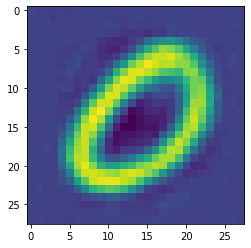

In [17]:
train_set[0]

plt.imshow(model.reconstruct(train_set[1]['x'])[0,0].data.numpy())

In [18]:
import torch.nn as nn

attributes_to_store = set()

for component_name in dir(model):
    component = getattr(model, component_name)
    if isinstance(component, nn.Module):
        store = False
        for name, parameter_group in component.named_parameters():
            store = store or parameter_group.requires_grad
        if store:
            attributes_to_store.add(component_name)

print(attributes_to_store)

{'decoder', 'encoder'}


In [33]:
import torchvision.datasets as ds

class CelebA(ds.CelebA):
     def _check_integrity(self):
            return True




In [56]:
from torchvision.transforms import ToTensor, Compose, CenterCrop
from torchvision.datasets import CelebA

dataset = CelebA(root='/data', download=True, transform=Compose([CenterCrop(218),ToTensor()]), target_type='landmarks')

Files already downloaded and verified


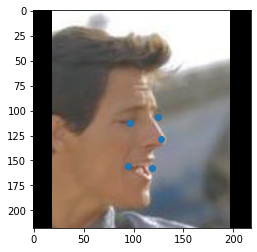

In [63]:
idx = 2

x, y = dataset[idx]

plt.imshow(x.permute(1,2,0))
x.shape

plt.plot(y.reshape(-1,2)[:,0]+(218-178)/2, y.reshape(-1,2)[:,1], 'o')


In [50]:
dataset[0][1]

tensor([ 69, 109, 106, 113,  77, 142,  73, 152, 108, 154])